In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import pyro
from pyro.distributions import Normal

When the prior variance changes.

Text(0, 0.5, 'percentage')

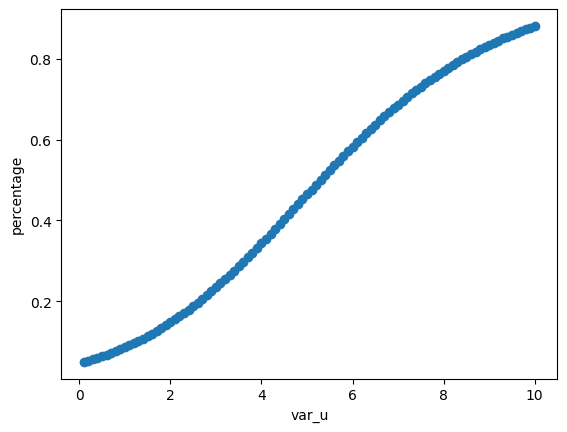

In [8]:
# time delay a list of 100 range 1-150
# prior variance a list of 100 range 0.1-10
# prior mean 0
# LL reward (also the estimation mean) 20
# estimation variance (uncertainty) 5
# ss value 3

var_u = np.linspace(0.1, 10, 100)
mean_u = torch.tensor(0.)
var_es = torch.tensor(3.)
mean_es = torch.tensor(20.)
ss = 3
percentage_list = []
estimate_list = []

delay = 10
for i in var_u:
    e = (mean_u*delay*var_es + mean_es*i)/(delay*var_es + i)
    estimate_list.append(e)
    p = torch.nn.functional.softmax(torch.tensor([e, ss]), dim = 0)[0]
    percentage_list.append(p)

plt.scatter(var_u, percentage_list)
plt.xlabel("var_u")
plt.ylabel("percentage")

Text(0, 0.5, 'estimations')

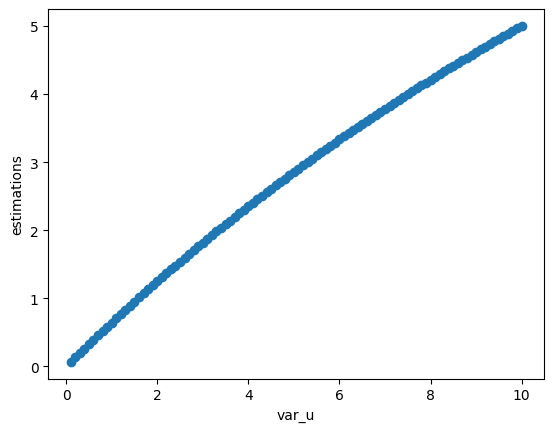

In [9]:
plt.scatter(var_u, estimate_list)
plt.xlabel("var_u")
plt.ylabel("estimations")

When the delay changes.

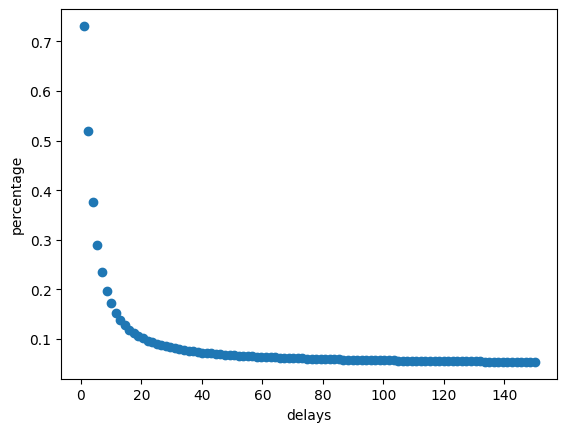

In [11]:
# time delay a list of 100 range 1-150
# prior variance a list of 100 range 0.1-10
# prior mean 0
# LL reward (also the estimation mean) 20
# estimation variance (uncertainty) 5
# ss value 3

delays = np.linspace(1, 150, 100)
var_u = torch.tensor(2.)
mean_u = torch.tensor(0.)
var_es = torch.tensor(.5)
mean_es = torch.tensor(5.)
ss = 3
percentage_list = []
estimate_list = []

for i in delays:
    e = (mean_u*i*var_es + mean_es*var_u)/(i*var_es + var_u)
    estimate_list.append(e)
    p = torch.nn.functional.softmax(torch.tensor([e, ss]), dim = 0)[0]
    percentage_list.append(p)

plt.scatter(delays, percentage_list)
plt.xlabel("delays")
plt.ylabel("percentage")
plt.savefig('images/two_distr_delay_percent.png')


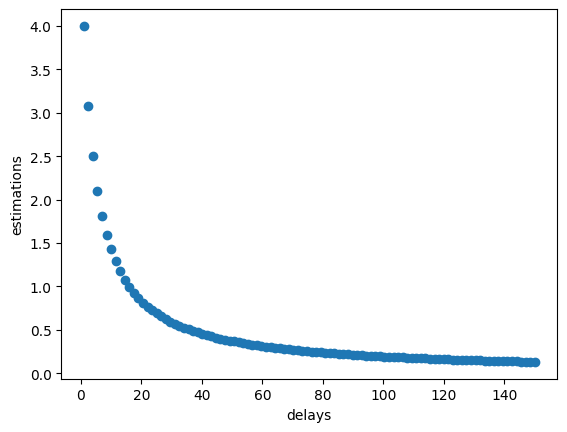

In [12]:
plt.scatter(delays, estimate_list)
plt.xlabel("delays")
plt.ylabel("estimations")
plt.savefig('images/two_distri_delay_esti_5.png')